https://drive.google.com/file/d/1xirWx4puolCmAoGa8FSGSc1iIbZ5HQ3S/view?usp=drive_link


In [1]:
! gdown --id 1xirWx4puolCmAoGa8FSGSc1iIbZ5HQ3S

/usr/local/lib/python3.12/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1xirWx4puolCmAoGa8FSGSc1iIbZ5HQ3S
To: /content/Data_base.csv
100% 6.35k/6.35k [00:00<00:00, 15.4MB/s]


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('/content/Data_base.csv')

In [4]:
plt.style.use('bmh')

In [5]:
df

,date,system_id,game_id,bet_sum,round_count
0,2022-09-01,1,100,100.000000,10.0
1,2022-09-02,1,100,50.000000,15.0
2,2022-09-03,1,100,250.000000,23.0
3,2022-09-04,1,100,300.000000,14.0
4,2022-09-05,1,100,45.000000,10.0
...,...,...,...,...,...
162,2022-09-26,2,102,141.666667,20.0
163,2022-09-27,2,102,145.000000,20.0
164,2022-09-28,2,102,186.666667,24.5
165,2022-09-29,2,102,144.166667,21.0


In [6]:
df.dtypes

,0
date,object
system_id,int64
game_id,int64
bet_sum,float64
round_count,float64


In [7]:
df['date'] = pd.to_datetime(df['date'])

In [8]:

df['day'] = df['date'].dt.day


In [9]:
df

,date,system_id,game_id,bet_sum,round_count,day
0,2022-09-01,1,100,100.000000,10.0,1
1,2022-09-02,1,100,50.000000,15.0,2
2,2022-09-03,1,100,250.000000,23.0,3
3,2022-09-04,1,100,300.000000,14.0,4
4,2022-09-05,1,100,45.000000,10.0,5
...,...,...,...,...,...,...
162,2022-09-26,2,102,141.666667,20.0,26
163,2022-09-27,2,102,145.000000,20.0,27
164,2022-09-28,2,102,186.666667,24.5,28
165,2022-09-29,2,102,144.166667,21.0,29


array([[<Axes: title={'center': 'bet_sum'}>]], dtype=object)

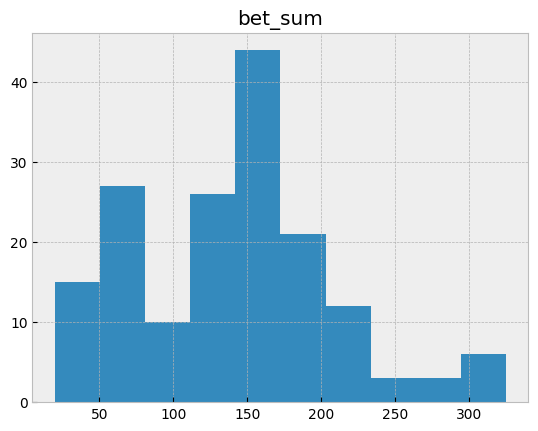

In [10]:
df.hist('bet_sum')

<Axes: >

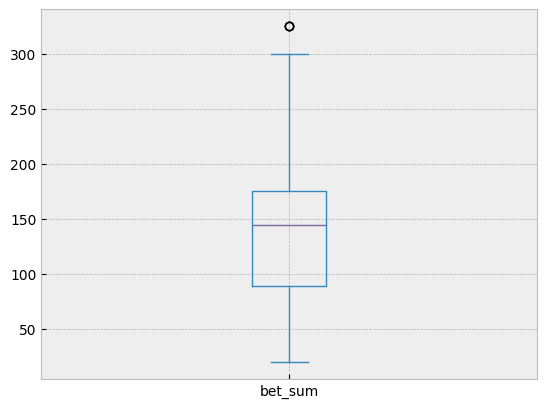

In [11]:
df['bet_sum'].plot(kind='box')

In [12]:
df['day_group']= pd.qcut(df['date'],4)

In [13]:
df.groupby('day_group')['bet_sum'].agg('median')

/tmp/ipython-input-1418298775.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('day_group')['bet_sum'].agg('median')


,bet_sum
day_group,
"(2022-08-31 23:59:59.999999999, 2022-09-07 12:00:00]",148.166667
"(2022-09-07 12:00:00, 2022-09-14 00:00:00]",132.500000
"(2022-09-14 00:00:00, 2022-09-22 00:00:00]",163.333333
"(2022-09-22 00:00:00, 2022-09-30 00:00:00]",142.500000


In [14]:
df.groupby('day_group')['round_count'].agg('median')

/tmp/ipython-input-2291465291.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('day_group')['round_count'].agg('median')


,round_count
day_group,
"(2022-08-31 23:59:59.999999999, 2022-09-07 12:00:00]",16.50
"(2022-09-07 12:00:00, 2022-09-14 00:00:00]",17.50
"(2022-09-14 00:00:00, 2022-09-22 00:00:00]",20.00
"(2022-09-22 00:00:00, 2022-09-30 00:00:00]",24.75


<Axes: xlabel='date'>

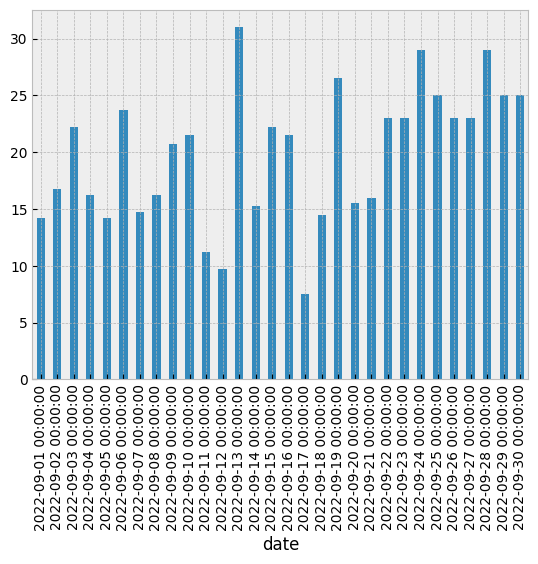

In [15]:
df.groupby('date')['round_count'].agg('median').plot(ylim=0, grid=True, kind = 'bar')

In [16]:
df.corr()

TypeError: float() argument must be a string or a real number, not 'pandas._libs.interval.Interval'

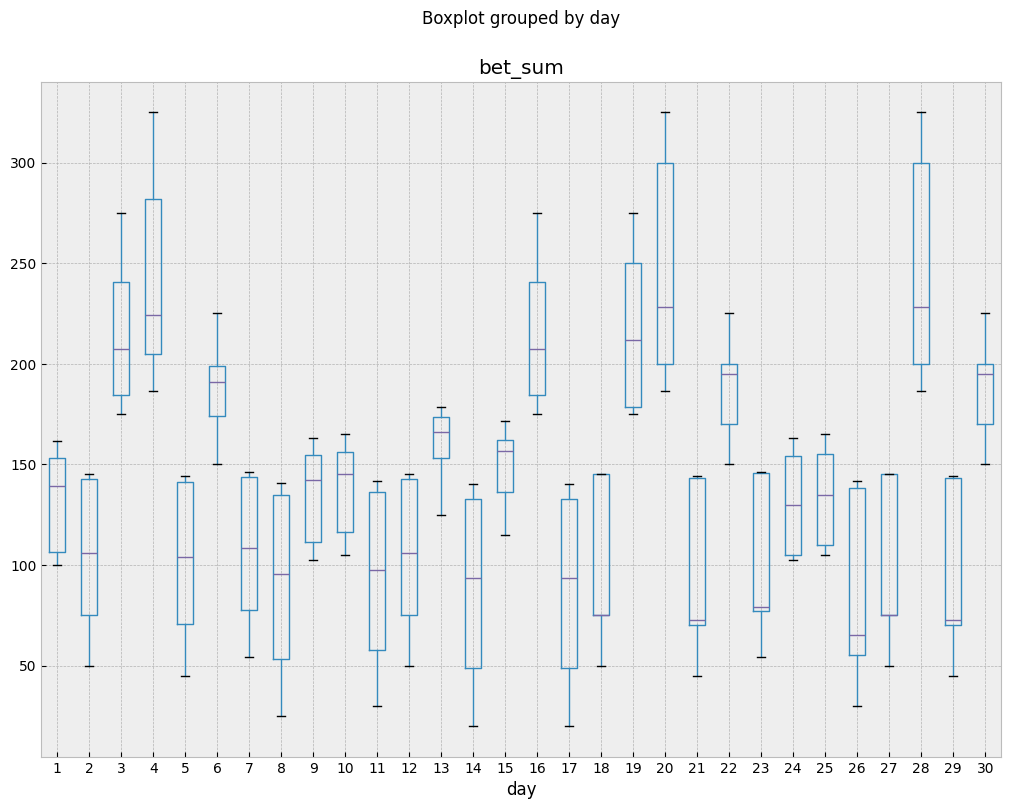

In [33]:
df.boxplot(column='bet_sum', by='day', figsize=(12,9))
plt.show()

In [34]:
! pip install phik

In [19]:
import phik
from phik.report import plot_correlation_matrix
from phik import report

In [20]:
phik_overview = df.phik_matrix()

interval columns not set, guessing: ['system_id', 'game_id', 'bet_sum', 'round_count', 'day']


In [21]:
phik_overview

,date,system_id,game_id,bet_sum,round_count,day,day_group
date,1.000000,0.000000,0.000000,0.680418,0.659768,1.000000,1.000000
system_id,0.000000,1.000000,0.036312,0.906103,0.449808,0.000000,0.000000
game_id,0.000000,0.036312,1.000000,0.560770,0.467627,0.000000,0.000000
bet_sum,0.680418,0.906103,0.560770,1.000000,0.502459,0.254085,0.231610
round_count,0.659768,0.449808,0.467627,0.502459,1.000000,0.457792,0.440914
day,1.000000,0.000000,0.000000,0.254085,0.457792,1.000000,0.963139
day_group,1.000000,0.000000,0.000000,0.231610,0.440914,0.963139,1.000000


Text(0.5, 1.0, 'Heatmap correlation Phik (𝜙k)')

/usr/local/lib/python3.12/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 120601 (\N{MATHEMATICAL ITALIC PHI SYMBOL}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 120601 (\N{MATHEMATICAL ITALIC PHI SYMBOL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


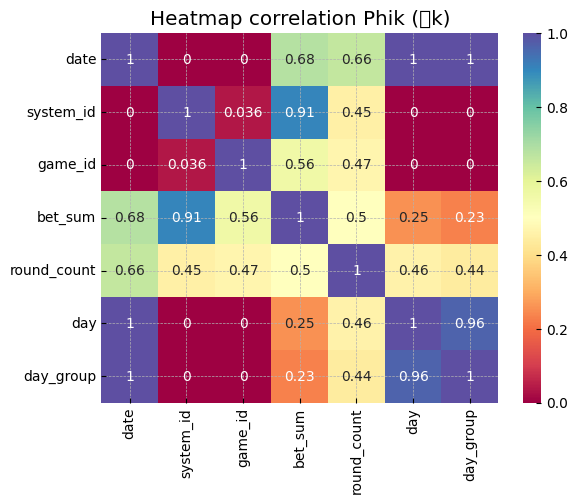

In [22]:
sns.heatmap(phik_overview, cmap='Spectral', annot=True)
plt.title('Heatmap correlation Phik (𝜙k)')

In [23]:
phik_overview['bet_sum'].sort_values(ascending=False)


,bet_sum
bet_sum,1.000000
system_id,0.906103
date,0.680418
game_id,0.560770
round_count,0.502459
day,0.254085
day_group,0.231610


In [24]:
df['date_group']= pd.qcut(df['date'],4)

In [25]:
df.groupby('date_group')['bet_sum'].agg(['mean','median'])

/tmp/ipython-input-1358199123.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('date_group')['bet_sum'].agg(['mean','median'])


,mean,median
date_group,,
"(2022-08-31 23:59:59.999999999, 2022-09-07 12:00:00]",155.952381,148.166667
"(2022-09-07 12:00:00, 2022-09-14 00:00:00]",115.555556,132.500000
"(2022-09-14 00:00:00, 2022-09-22 00:00:00]",161.589147,163.333333
"(2022-09-22 00:00:00, 2022-09-30 00:00:00]",135.050000,142.500000


/tmp/ipython-input-1887141589.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('date_group')['bet_sum'].agg('median').plot(ylim=0,grid=True,kind = 'bar')


<Axes: xlabel='date_group'>

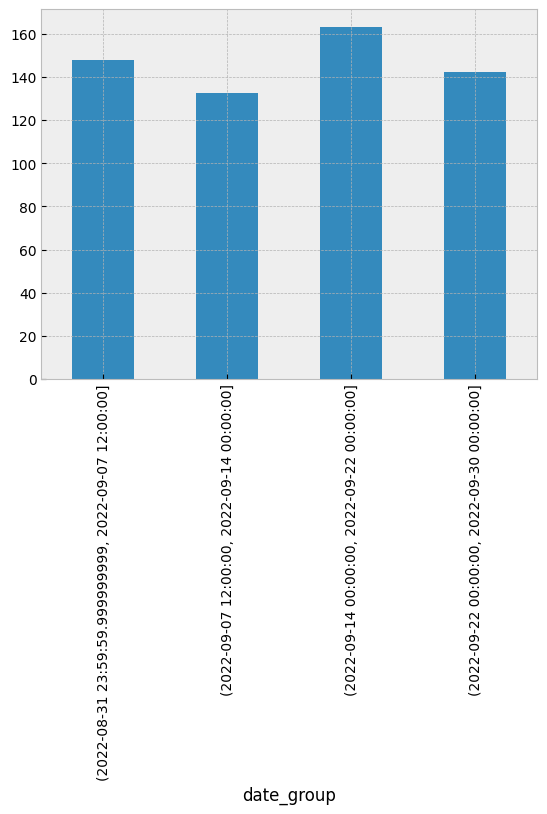

In [26]:
df.groupby('date_group')['bet_sum'].agg('median').plot(ylim=0,grid=True,kind = 'bar')

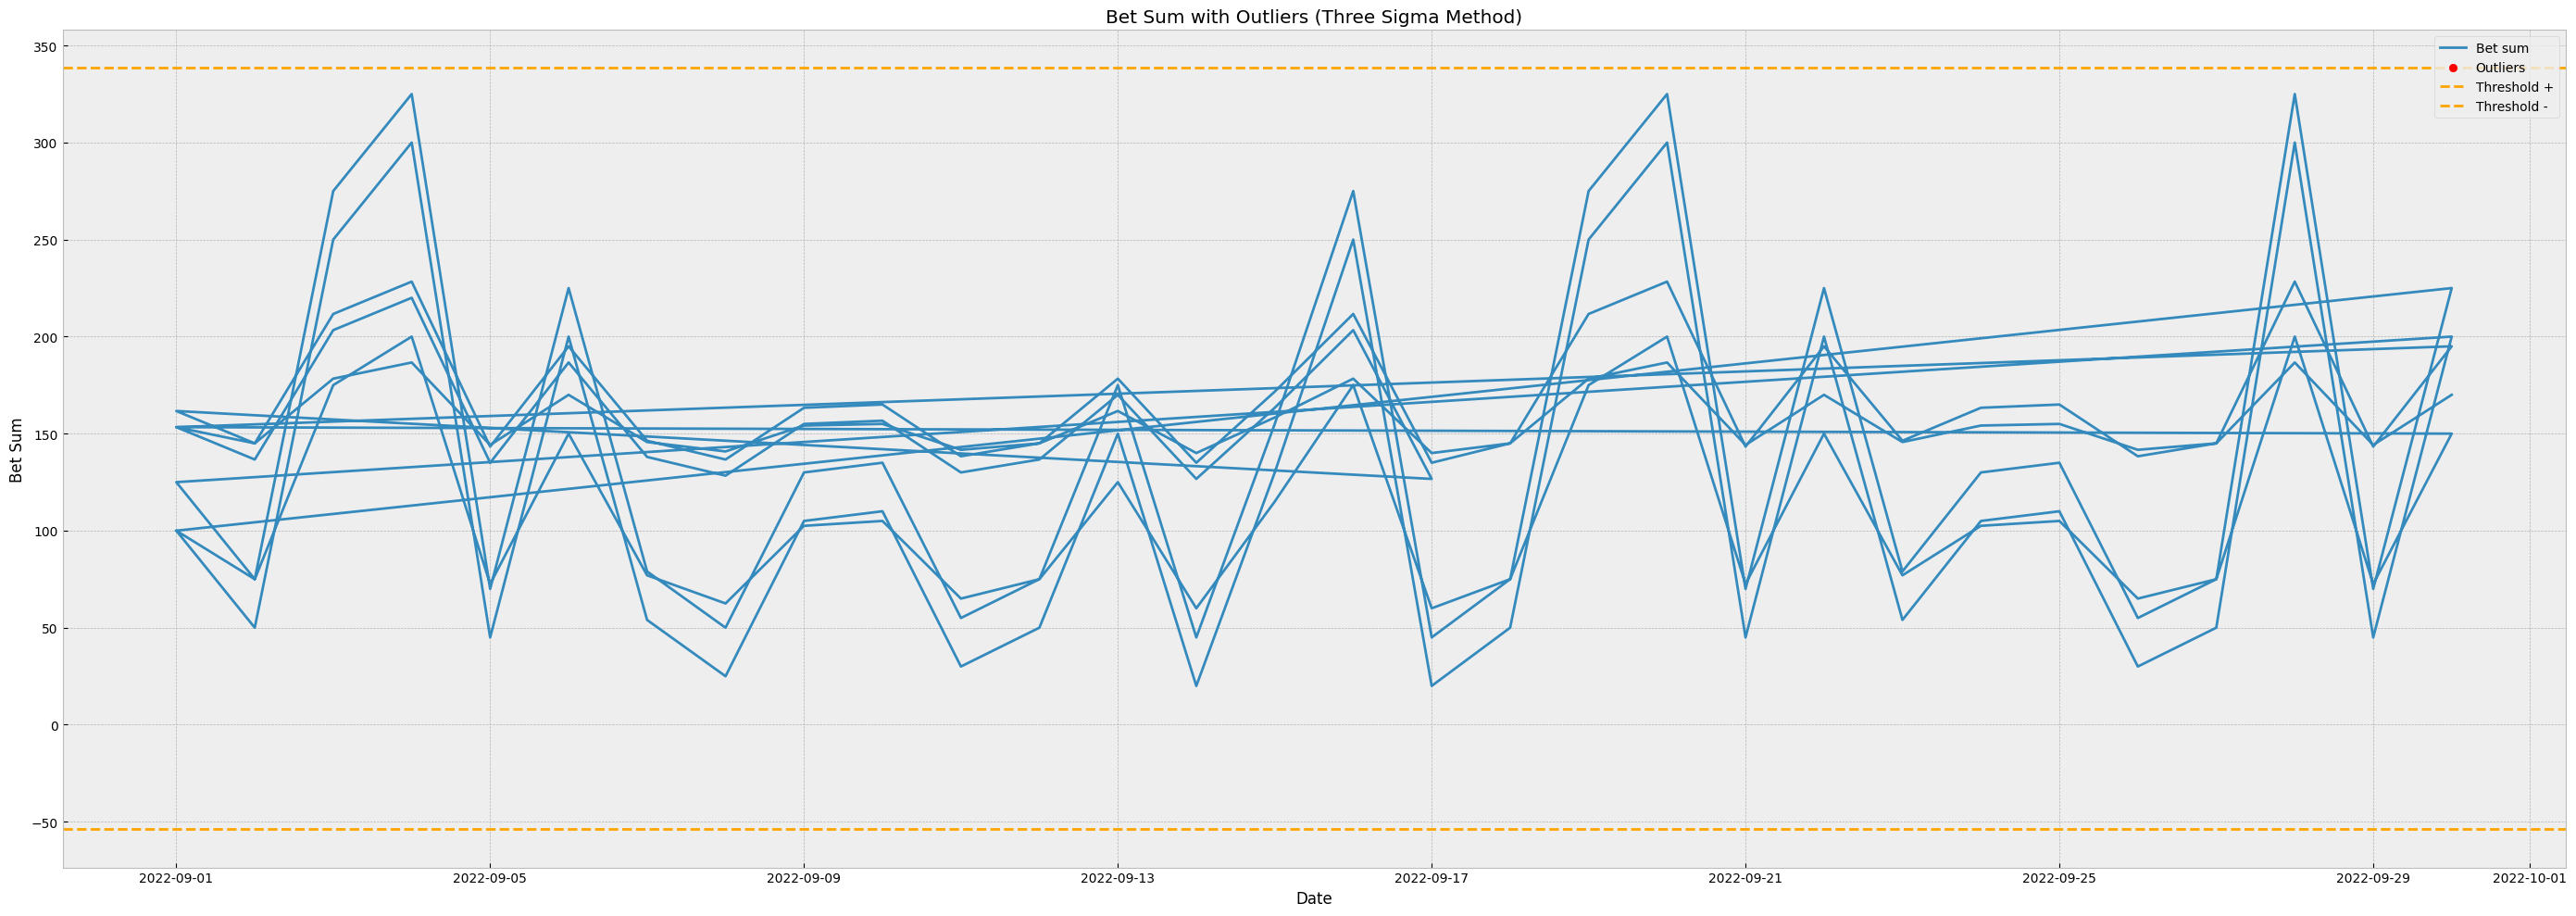

In [39]:
def detect_outliers(df, col):
    mean = df[col].mean()
    std = df[col].std()
    threshold = 3 * std
    outliers = df[(df[col] > mean + threshold) | (df[col] < mean - threshold)]
    return outliers, mean, threshold

# Виклик функції
outliers, mean, threshold = detect_outliers(df, 'bet_sum')

# Візуалізація
plt.figure(figsize=(28, 10))
plt.plot(df['date'], df['bet_sum'], label='Bet sum')
plt.scatter(outliers['date'], outliers['bet_sum'], color='red', label='Outliers')
plt.axhline(mean + threshold, color='orange', linestyle='--', label='Threshold +')
plt.axhline(mean - threshold, color='orange', linestyle='--', label='Threshold -')
plt.title('Bet Sum with Outliers (Three Sigma Method)')
plt.xlabel('Date')
plt.ylabel('Bet Sum')
plt.legend()
plt.tight_layout()
plt.show()



At the end of the month, players were playing more rounds but betting less per round — leading to a drop in the overall bet_sum.

The most significant factor influencing results is system_id, followed by time trend and game.

Next steps: analyze the average bet per round, break down results by system and game, include day of the week, and confirm the findings with a regression analysis.